実行前に opencv-python をインストールする

In [9]:
# Google colab の場合、実験に使う画像をダウンロードする
#!wget https://github.com/opencv/opencv/blob/master/samples/data/lena.jpg
#!wget https://github.com/opencv/opencv/blob/master/samples/data/sudoku.png
#!wget https://github.com/opencv/opencv/blob/master/samples/data/detect_blob.png

In [10]:
import matplotlib.pyplot as plt
import cv2 # opencv ライブラリをインポート
print(cv2.__version__) # バージョンを確認

4.5.4


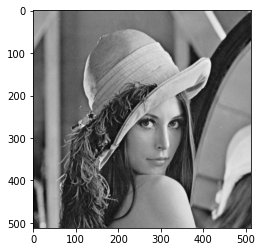

(512, 512)


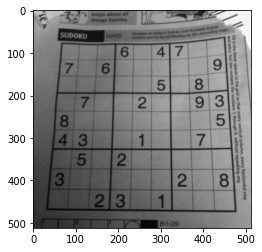

(512, 512)


In [11]:
# 実験で使うサンプル画像を変数に読み込み、表示
img_lena = cv2.imread('lena.jpg')
img_lena = cv2.cvtColor(img_lena, cv2.COLOR_BGR2RGB)
img_lena = cv2.cvtColor(img_lena, cv2.COLOR_RGB2GRAY)
plt.imshow(img_lena)
plt.gray() # グレイ画像を表示する場合に挿入
plt.show()
print(img_lena.shape)

img_sudoku = cv2.imread('sudoku.png')
img_sudoku = cv2.cvtColor(img_sudoku, cv2.COLOR_BGR2GRAY)
img_sudoku = cv2.resize(img_sudoku, img_lena.shape)
plt.imshow(img_sudoku)
plt.show()
print(img_sudoku.shape)


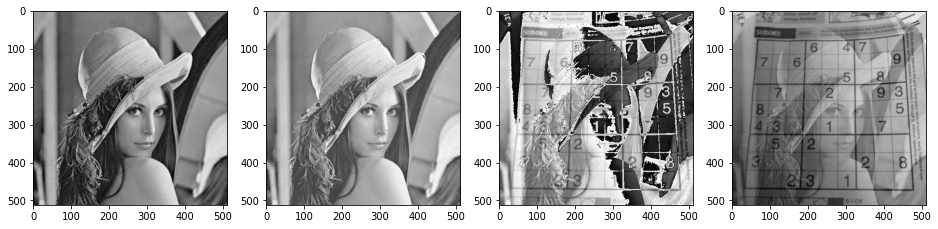

In [12]:
# 画像間演算
fix, ax = plt.subplots(1, 4, figsize=(16,5))
# オリジナルの画像
ax[0].imshow(img_lena)

# 各画素の25を加え、画像を明るくする
ax[1].imshow(img_lena + 25)

# 女性の画像に数独の画像を足す (0-255 を越えるとオーバーフロー/アンダーフロー する)
ax[2].imshow(img_lena + img_sudoku) 

# 女性の画像に数独の画像のそれぞれに重みをつけて合成 (アルファブレンディング)
dst = cv2.addWeighted(img_lena, 0.3, img_sudoku, 0.7, 0) # img_1 * a + img_2 * b + c
ax[3].imshow(dst)
plt.gray() # グレイ画像を表示する場合に挿入
plt.show()


画像中の物体の数 17


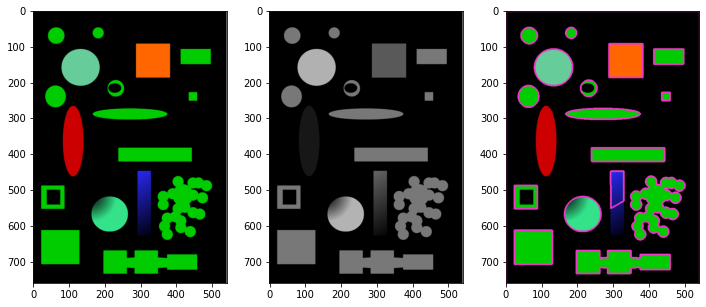

In [13]:
# 画像中の物体をカウントする
import cv2
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(12,5))
# 対象の画像を読み込み、グレースケールに変換して表示
img_color = cv2.imread('detect_blob.png')
ax[0].imshow(img_color)
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
ax[1].imshow(img_gray)

# 画像を二値化 (二値化する際の輝度閾値は 50 に設定) し、画像中の輪郭を抽出
thresh_value=50
thresh, img_thresh = cv2.threshold(img_gray, thresh_value, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 抽出した輪郭の数を表示し、抽出した輪郭を描画
print('画像中の物体の数', len(contours))
img = cv2.drawContours(img_color, contours, -1, (240,55,200), 3)
ax[2].imshow(img)
plt.show()

In [ ]:
# 利用する画像 (フルベッキ群像写真)
#!wget https://upload.wikimedia.org/wikipedia/commons/c/cd/Verbeck_picture.jpg
# モデル 
#!wget https://github.com/kipr/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml

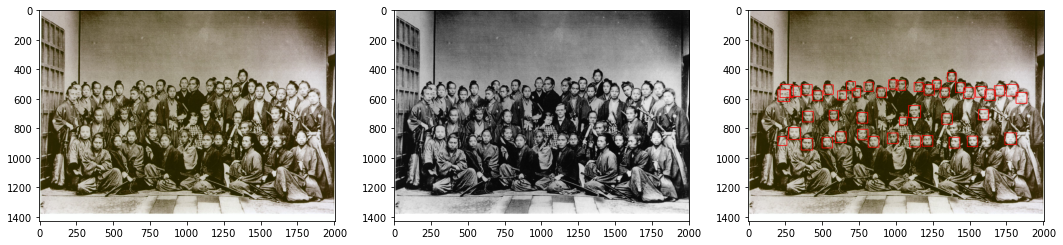

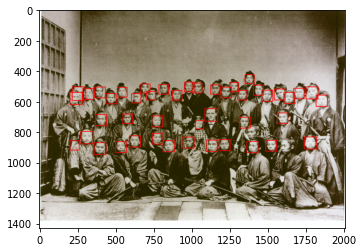

In [22]:
# 顔検出
import cv2
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(18,5))
# 対象の画像を読み込み、グレースケールに変換して表示
img_color = cv2.imread('Verbeck_picture.jpg')
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
ax[0].imshow(img_color)
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
ax[1].imshow(img_gray)

# 学習済みのモデルを読み込み、検出した顔の周囲に四角を描画
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)
for (x,y,w,h) in faces:
    img_color = cv2.rectangle(img_color, (x,y), (x+w,y+h), (255,0,0), 3)
ax[2].imshow(img_color)
plt.show()

plt.imshow(img_color)
plt.show()